$$$Lab 2

### Lab 2 ~

Points:
Musical notes are defined by their position on the staff (frequency) and note type (duration).
Frequencies for notes in the middle C octave are provided.

For generating Node writing helper Functions:

In [10]:
import numpy as np

def get_instrument():
    # Define harmonic amplitudes for a more complex instrument
    harmonics = [1.0, 0.5, 0.25, 0.1]  # Fundamental + three harmonics

    # Define the note envelope with an ADSR (Attack-Decay-Sustain-Release) shape
    def envelope(t, d):
        attack_time = 0.1 * d
        decay_time = 0.1 * d
        sustain_level = 0.7
        release_time = 0.2 * d
        sustain_time = d - (attack_time + decay_time + release_time)

        env = np.zeros_like(t)
        env[t < attack_time] = t[t < attack_time] / attack_time
        env[(t >= attack_time) & (t < attack_time + decay_time)] = (
            1 - (1 - sustain_level) * (t[(t >= attack_time) & (t < attack_time + decay_time)] - attack_time) / decay_time
        )
        env[(t >= attack_time + decay_time) & (t < attack_time + decay_time + sustain_time)] = sustain_level
        env[(t >= attack_time + decay_time + sustain_time) & (t < d)] = sustain_level * (
            1 - (t[(t >= attack_time + decay_time + sustain_time) & (t < d)] - (attack_time + decay_time + sustain_time)) / release_time
        )

        return env

    return harmonics, envelope


In [7]:
def generate_note(frequency, duration, amplitude, harmonics, envelope, fs):
    t = np.arange(0, duration, 1/fs)
    waveform = np.zeros_like(t)
    
    # Add fundamental and harmonics
    for i, h in enumerate(harmonics):
        waveform += h * np.sin(2 * np.pi * (i + 1) * frequency * t)
    
    # Apply envelope
    env = envelope(t, duration)
    waveform *= env
    
    return amplitude * waveform


Final Merging all codes together for generating score waveform

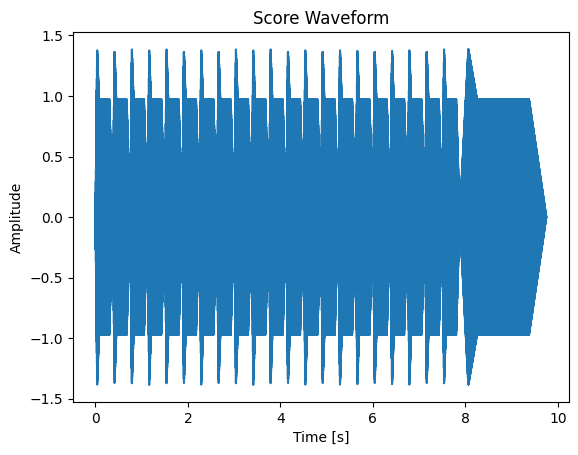

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

# Instrument definition
def get_instrument():
    # Harmonics: fundamental + three harmonics
    harmonics = [1.0, 0.5, 0.25, 0.1]

    # ADSR envelope function
    def envelope(t, d):
        attack_time = 0.1 * d  # 10% of the duration
        decay_time = 0.1 * d   # 10% of the duration
        sustain_level = 0.7    # Sustain level at 70% of the peak
        release_time = 0.2 * d # 20% of the duration
        sustain_time = d - (attack_time + decay_time + release_time)  # Remaining time for sustain

        env = np.zeros_like(t)
        env[t < attack_time] = t[t < attack_time] / attack_time
        env[(t >= attack_time) & (t < attack_time + decay_time)] = (
            1 - (1 - sustain_level) * (t[(t >= attack_time) & (t < attack_time + decay_time)] - attack_time) / decay_time
        )
        env[(t >= attack_time + decay_time) & (t < attack_time + decay_time + sustain_time)] = sustain_level
        env[(t >= attack_time + decay_time + sustain_time) & (t < d)] = sustain_level * (
            1 - (t[(t >= attack_time + decay_time + sustain_time) & (t < d)] - (attack_time + decay_time + sustain_time)) / release_time
        )

        return env

    return harmonics, envelope

# Note generation
def generate_note(frequency, duration, amplitude, harmonics, envelope, fs):
    t = np.arange(0, duration, 1/fs)
    waveform = np.zeros_like(t)
    
    for i, h in enumerate(harmonics):
        waveform += h * np.sin(2 * np.pi * (i + 1) * frequency * t)
    
    env = envelope(t, duration)
    waveform *= env
    
    return amplitude * waveform

# Music synthesis
def mkmusic():
    plt.close('all')
    
    notes = {
        'A': 220.0, 'As': 233.08, 'B': 246.94, 'C': 261.63, 'Cs': 277.18, 
        'D': 293.66, 'Ds': 311.13, 'E': 329.63, 'F': 349.23, 'Fs': 369.99, 
        'G': 392.00, 'Gs': 415.30, 'A2': 440.00
    }

    harmonics, envelope = get_instrument()

    # Note frequencies, durations, and amplitudes
    nf = [notes[note] for note in ['G', 'E', 'D', 'C', 'D', 'E', 'G', 'E', 'D', 'C', 'D', 'E', 'G', 'E', 'G', 'A2', 'E', 'A2', 'G', 'E', 'D', 'C']]
    nd = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4/5]
    na = [1] * len(nf)
    TD = 1.5  # Duration of one whole note in seconds
    fs = 44100  # Sampling frequency
    
    total_duration = sum(TD / d for d in nd)
    total_samples = int(total_duration * fs)
    
    score_waveform = np.zeros(total_samples)
    pointer = 0
    
    for frequency, duration, amplitude in zip(nf, nd, na):
        note_waveform = generate_note(frequency, TD / duration, amplitude, harmonics, envelope, fs)
        note_samples = len(note_waveform)
        
        # Ensure note waveform fits into the remaining score waveform
        if pointer + note_samples > total_samples:
            note_waveform = note_waveform[:total_samples - pointer]
        
        score_waveform[pointer:pointer+note_samples] += note_waveform
        pointer += note_samples
    
    # Time array for plotting
    t = np.arange(0, len(score_waveform)) / fs
    plt.plot(t, score_waveform)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title('Score Waveform')
    plt.show()
    
    # Play the generated score waveform
    sd.play(score_waveform, fs)
    sd.wait()

# Run the music synthesis
mkmusic()


Real instruments have at least two additional important characteristics. First, when a particular
note is played not only is the fundamental frequency is generated but also higher harmonics
of the fundamental. The amplitudes of the harmonics are usually significantly less than that
of the fundamental.In addition to harmonics, the instrument also produces a characteristic note envelope.

Generating a Single Note: Define frequency, duration, and amplitude.
Combining Notes: Use loops and appropriate delays to combine individual notes into a musical piece.
Saving and Playing Music: Store the synthesized music in .wav format and play it using an audio player.

In [2]:
pip install sounddevice

   ---------------------------------------- 0.0/200.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/200.1 kB ? eta -:--:--
   -- ------------------------------------- 10.2/200.1 kB ? eta -:--:--
   ----- --------------------------------- 30.7/200.1 kB 660.6 kB/s eta 0:00:01
   ----------- --------------------------- 61.4/200.1 kB 469.7 kB/s eta 0:00:01
   ------------- ------------------------- 71.7/200.1 kB 393.8 kB/s eta 0:00:01
   --------------------- ---------------- 112.6/200.1 kB 547.6 kB/s eta 0:00:01
   --------------------------- ---------- 143.4/200.1 kB 607.9 kB/s eta 0:00:01
   ------------------------------------ - 194.6/200.1 kB 655.9 kB/s eta 0:00:01
   -------------------------------------- 200.1/200.1 kB 608.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
